# Date of Death Calculator for Newly Reported Fatalities
Compares differences between `FatalitiesOverTimeByCounty` data files to determine the actual dates of death for newly reported fatalities (**not the date the death was reported**). This analysis is only possible with access to the daily versions of these files because changes are not recorded otherwise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import MaxNLocator

### Load fatality data from two consecutive days

In [2]:
f1 = 'FatalitiesOverTimeByCounty/2021-03-18.xlsx'
f2 = 'FatalitiesOverTimeByCounty/2021-03-19.xlsx'

In [3]:
df1 = pd.read_excel(f1, sheet_name='Fatalities by County', index_col=[0], header=2, nrows=256)
df1.dropna(axis=1, how='all', inplace=True)
df2 = pd.read_excel(f2, sheet_name='Fatalities by County', index_col=[0], header=2, nrows=256)
df2.dropna(axis=1, how='all', inplace=True)

In [4]:
# Parse column text as dates
df1.columns = df1.columns.map(lambda x: pd.to_datetime(x.split(" ")[-1]))
df2.columns = df2.columns.map(lambda x: pd.to_datetime(x.split(" ")[-1]))

## Select a specific county (or statewide) to plot
`county` should match the formatting of the 'County Name' column in the Excel files

In [5]:
county = "Total"

Calculate daily changes in cumulative fatalities and find difference to determine when the newly reported fatalities were added

In [6]:
df1_diff = df1.loc[county].diff()
df2_diff = df2.loc[county].diff()
new_fatalities = df2_diff - df1_diff

Plot

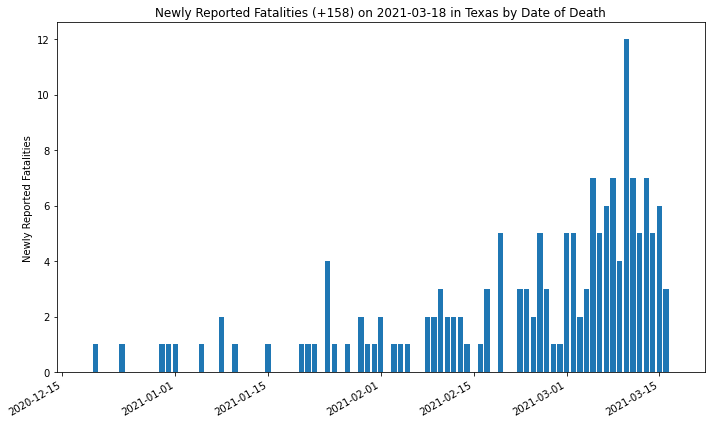

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(new_fatalities.index[-90:], new_fatalities[-90:]) # Plot over last 90 days
fig.autofmt_xdate()
ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
plt.ylabel("Newly Reported Fatalities")
if county == "Total":
    loc = "Texas"
else:
    loc = f"{county.title()} County"
plt.title(f"Newly Reported Fatalities (+{new_fatalities.sum():0.0f}) on {new_fatalities.index[-1].date()} in {loc} by Date of Death")
plt.tight_layout()
# plt.savefig(f"NewFatalities_{county}.png", dpi=300, facecolor="w", transparent=False)